<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/economicdata1_datacollection_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析(1) : 株価データの取得／相関／移動平均

経済データ・金融データを対象に分析を進める。

オープンデータの際に用いたデータ可視化に加えて，**統計学的分析手法** を導入する。

経済・金融データの入手方法として，従来は Yahoo! ファイナンス等からのスクレイピングが主流だったが，現在では（システムにかかる負荷等を考慮し）スクレイピングは概ね禁止されている。

そこで Pandas DataReader を用いて，stooq というデータソースから株価データを収集することとする。

---

## 授業で取り扱うデータ
東京証券取引所（東証; Tokyo Stock Exchange; TSE）に上場された企業の株価を対象とする。
東証では平日の9:00～15:00 の計5時間，取引が行われる（ただし11:30～12:30は取引が行われない）。
１日の取引の中で，開始時についた値段を始値（Open），期間中の最も高い／安い値段をそれぞれ高値（High）／安値（Low），最後に付いた値段を終値（Close）と呼ぶ。

特に終値(Close)は市場が最終的に辿り着いた価格として最も重要視される。

**(注意) 本来ならば調整後終値(Adj Close)を用いるべきだが，後述するデータ・ソース stooq からは終値(Close)しか入手できないため，これを用いて分析を進める。**

---

## Pandas Datareader とは
Pandas Datareader とは，Web上の様々なデータソースにアクセスし，株価・為替レート・人口・GDPなどのデータを Pandas のデータフレームとして取得するライブラリである。

pandas-datareader の公式サイト：

https://pandas-datareader.readthedocs.io/en/latest/


本演習では，日経平均株価，米国株や日本株の株価を取得するために用いる。

## (Anaconda のみ) Pandas Datareader ライブラリのインストール
下記のコマンドを入力することで，Google Colab にて Pandas Datareader ライブラリが利用可能となる。

**Google Colab には最初から Pandas Datareader が入っている！**

Anaconda で演習に取り組んでいる場合，下記のとおり，pip コマンドを用いて panda-datareader をインストールすること

In [ ]:
!pip install pandas_datareader

---

## Pandas Datareader を用いた株価データ入手
東京証券取引所(Tokyo Stock Exchange; TSE)で扱われる銘柄の株価を取得する。
データ取得期間は 2019年1月1日～2020年12月31日とする。

ここで銘柄コード (stock indicator) が必要となるが，Yahoo! ファイナンスや日本取引所グループのサイト等を利用して取得するものとする。

- Yahoo! ファイナンス： https://stocks.finance.yahoo.co.jp/stocks/qi/?ids=3650
- 日本取引所グループ： https://www.jpx.co.jp/

以下ではソニー(株)と(株)日立製作所の株価の推移をプログラムとして示している。

In [1]:
from pandas_datareader import data
from datetime import datetime

start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)

# ソニーと日立製作所の株価データを取得する
# ソニー(株) の銘柄コードは 6758，(株)日立製作所のそれは 6501
sony = data.DataReader('6758.JP', data_source='stooq', start=start, end=end)
hitachi = data.DataReader('6501.JP', data_source='stooq', start=start, end=end)

取得したデータは，以下に示すように pandas のデータフレームとなっている。
ここで始値(Open)，高値(High)，安値(Low)，終値(Close)および出来高(Volume; １日に取引が成立した株数)がデータとして含まれる。

ただし，日付は「新 → 古」順に並んでいる点に注意が必要である。

In [2]:
sony.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-30,10355.0,10360.0,10190.0,10285.0,3244500
2020-12-29,10305.0,10475.0,10305.0,10390.0,4198100
2020-12-28,9950.0,10215.0,9927.0,10180.0,3170900
2020-12-25,10045.0,10050.0,9942.0,9953.0,2465200
2020-12-24,10170.0,10220.0,10035.0,10090.0,2497200


In [3]:
# Stooq のデータは「新→古」の順番となっている。
# そこで，データを古い日付から新しい日付に並べ直す (index を対象としたソート)
sony = sony.sort_index()
hitachi = hitachi.sort_index()

In [4]:
# ソニーの株価データ（冒頭）の確認
sony.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-04,5091.39,5127.99,4969.74,5125.01,9140520
2019-01-07,5343.58,5421.72,5276.33,5310.94,6954479
2019-01-08,5335.67,5348.53,5251.61,5316.87,5828294
2019-01-09,5379.19,5404.90,5313.91,5353.47,5089773
2019-01-10,5290.18,5325.79,5165.57,5188.31,6644167


ソニーと日立の株価の推移を可視化する。

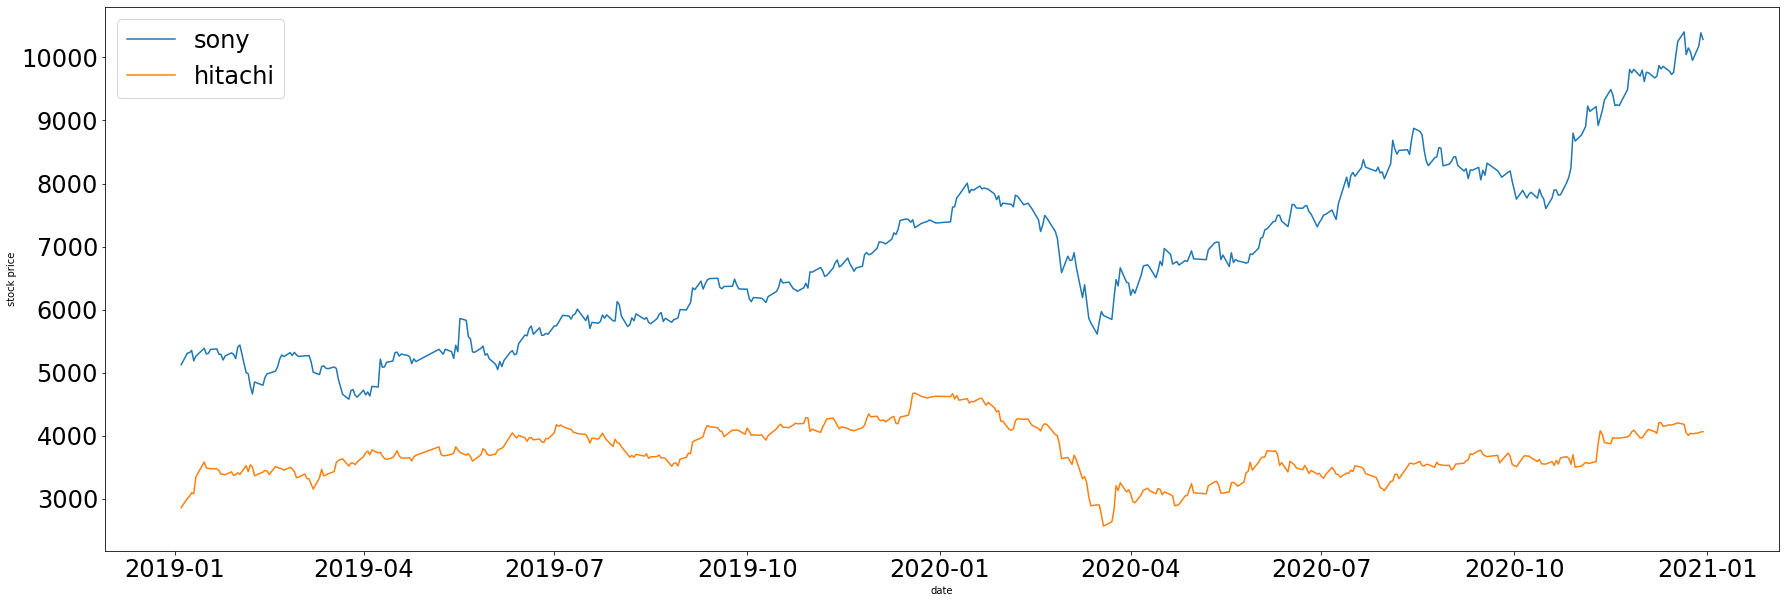

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(sony['Close'], label='sony') # 終値を表示
plt.plot(hitachi['Close'], label='hitachi') # 終値を表示
plt.xlabel("date")
plt.ylabel("stock price")
plt.xticks(fontsize=24) # x軸ラベルのフォントサイズを大きめに設定
plt.yticks(fontsize=24) # y軸ラベルのフォントサイズを大きめに設定
plt.legend(fontsize=24) # 凡例のフォントサイズを大きめに設定
plt.show()

---

## 複数の企業の株価データを同時に取得する
以下ではソニー，日立製作所および東芝の株価データを同時に取得する。

DataReader([stock indicator のリスト], データソース, 取得開始日, 取得終了日) という形で，**stock indicator のリスト**を引数に与えればよい。

また，以下の例では終値(Close)のみに絞ってデータフレーム df へ格納している。

In [6]:
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)

# ソニー，日立製作所および東芝の株価データを取得する
# ソニー(株) の銘柄は 6758，(株)日立製作所のそれは 6501，東芝のそれは 6502
#
df = data.DataReader(['6758.JP', '6501.JP', '6502.JP'], data_source='stooq', start=start, end=end)['Close']

# 日付の並べ替え
df = df.sort_index()

# 後の解釈のため，コードを企業名へ置き換える
df = df.rename(columns={'6758.JP':'Sony', '6501.JP':'Hitachi', '6502.JP':'Toshiba'})

In [7]:
df.head()

Symbols,Sony,Hitachi,Toshiba
Date,,,
2019-01-04,5125.01,2859.0,3011.28
2019-01-07,5310.94,3007.0,3143.91
2019-01-08,5316.87,3040.0,3163.56
2019-01-09,5353.47,3094.0,3212.69
2019-01-10,5188.31,3080.0,3193.02


データの中身を可視化する。

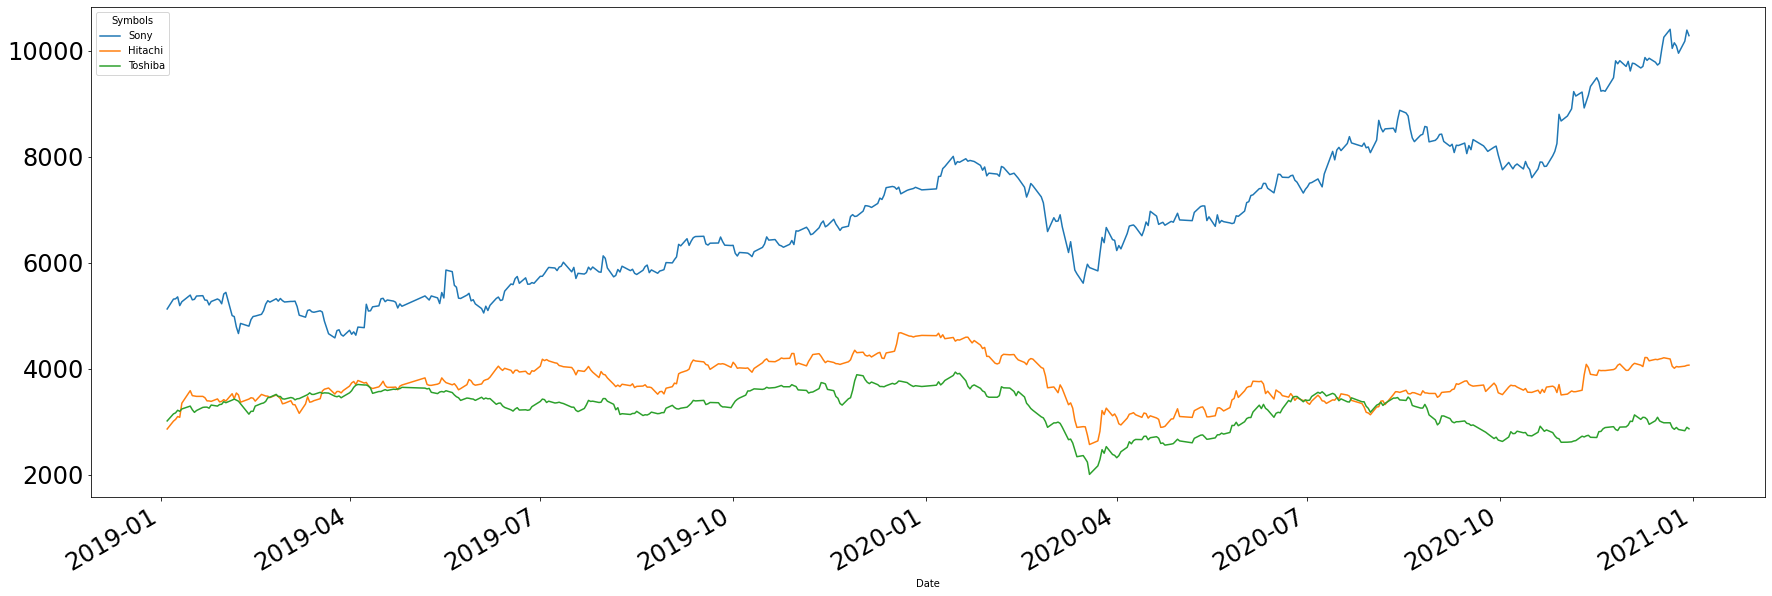

In [8]:
# 可視化
df.plot(figsize=(30,10), fontsize=24)

---

## 株価の時系列相関
以下では，３社の株価データを取得し，可視化して大まかな傾向を見た後，corr() メソッドを用いて相関係数を求めている。

**(注意) 個々の企業の株価は，元の値が異なるため，変動パーセント(percentage change)に対して相関をとるべきである。しかし，以下では（練習の観点から）株価そのものを用いて相関を求める。**

### 株価データを個別に取ってくるパターン

In [9]:
from pandas_datareader import data
from datetime import datetime

start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)

# ソニーグループ，日立製作所および東芝の株価データを取得する
# stock indicator・・・ソニーグループ：6758，日立製作所：6501，東芝：6502
#
sony = data.DataReader('6758.JP', 'stooq', start, end)
hitachi = data.DataReader('6501.JP', 'stooq', start, end)
toshiba = data.DataReader('6502.JP', 'stooq', start, end)

# Stooq のデータは「新→古」の順番となっている。
# そこで，データを古い日付から新しい日付に並べ直す (index を対象としたソート)
sony = sony['Close'].sort_index()
hitachi = hitachi['Close'].sort_index()
toshiba = toshiba['Close'].sort_index()

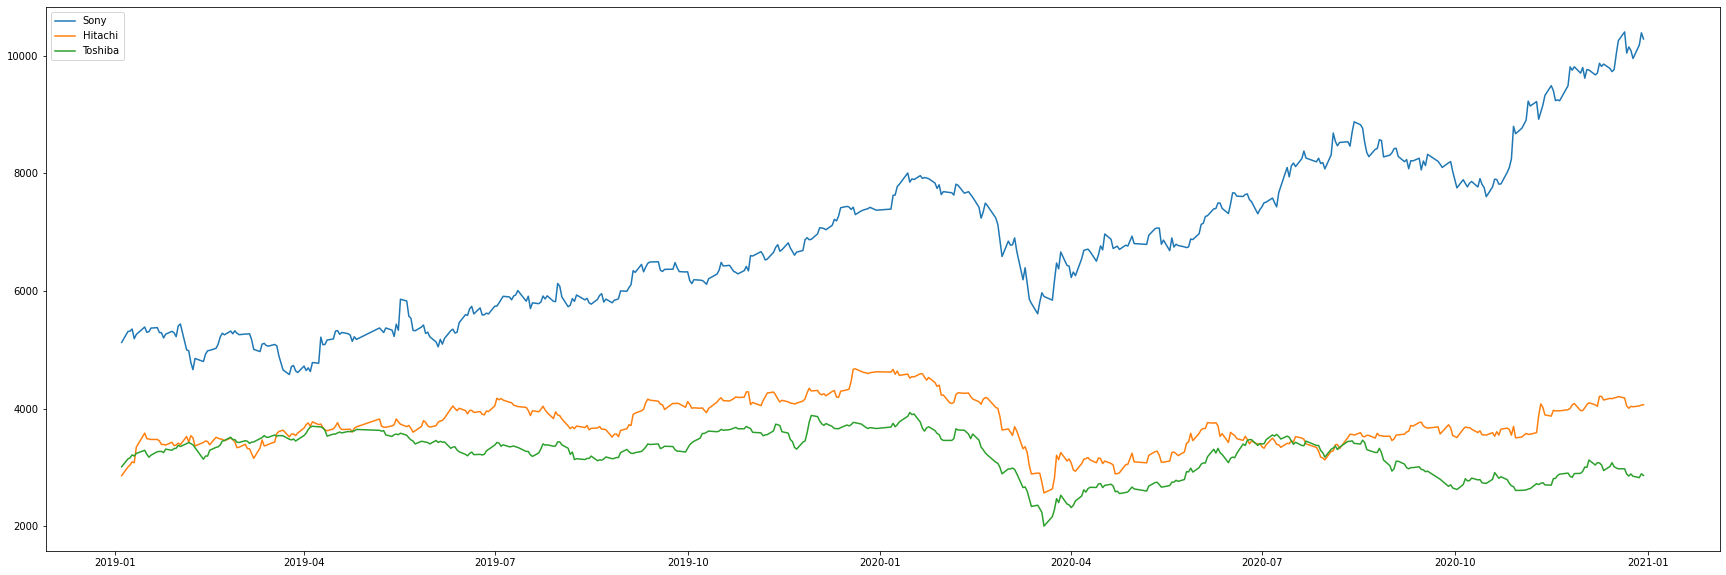

In [10]:
# 可視化
plt.figure(figsize=(30, 10))
plt.plot(sony, label="Sony")
plt.plot(hitachi, label="Hitachi")
plt.plot(toshiba, label="Toshiba")
plt.legend()
plt.show()

日立製作所と東芝は類似した株価推移を示す。一方，ソニーは他の２社と（特に 2020年4月以降において）株価変動の傾向が異なる。

そこで，「東芝と日立製作所」と「ソニーと日立製作所」それぞれの相関を求めると，前者は 0.59 という高い相関を示すが，「ソニーと日立製作所」は低めの相関となった。

In [11]:
# Pearson の相関係数
corr_toshiba_hitachi = toshiba.corr(hitachi)
print("東芝と日立 : {}".format(corr_toshiba_hitachi))

corr_sony_hitachi = sony.corr(hitachi)
print("ソニーと日立 : {}".format(corr_sony_hitachi))

東芝と日立 : 0.5857381568554177
ソニーと日立 : 0.23253044194531286


### 複数の株価データを一斉に取ってくるパターン

In [12]:
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)

# ソニーと日立製作所の株価データを取得する
# 6758 : stock indicator
# ソニー(株) の TSEコードは 6758，(株)日立製作所のそれは 6501
#
df = data.DataReader(['6758.JP', '6501.JP', '6502.JP'], data_source='stooq', start=start, end=end)['Close']
df = df.sort_index()

# 後の解釈のため，コードを企業名へ置き換える
df = df.rename(columns={'6758.JP':'Sony', '6501.JP':'Hitachi', '6502.JP':'Toshiba'})

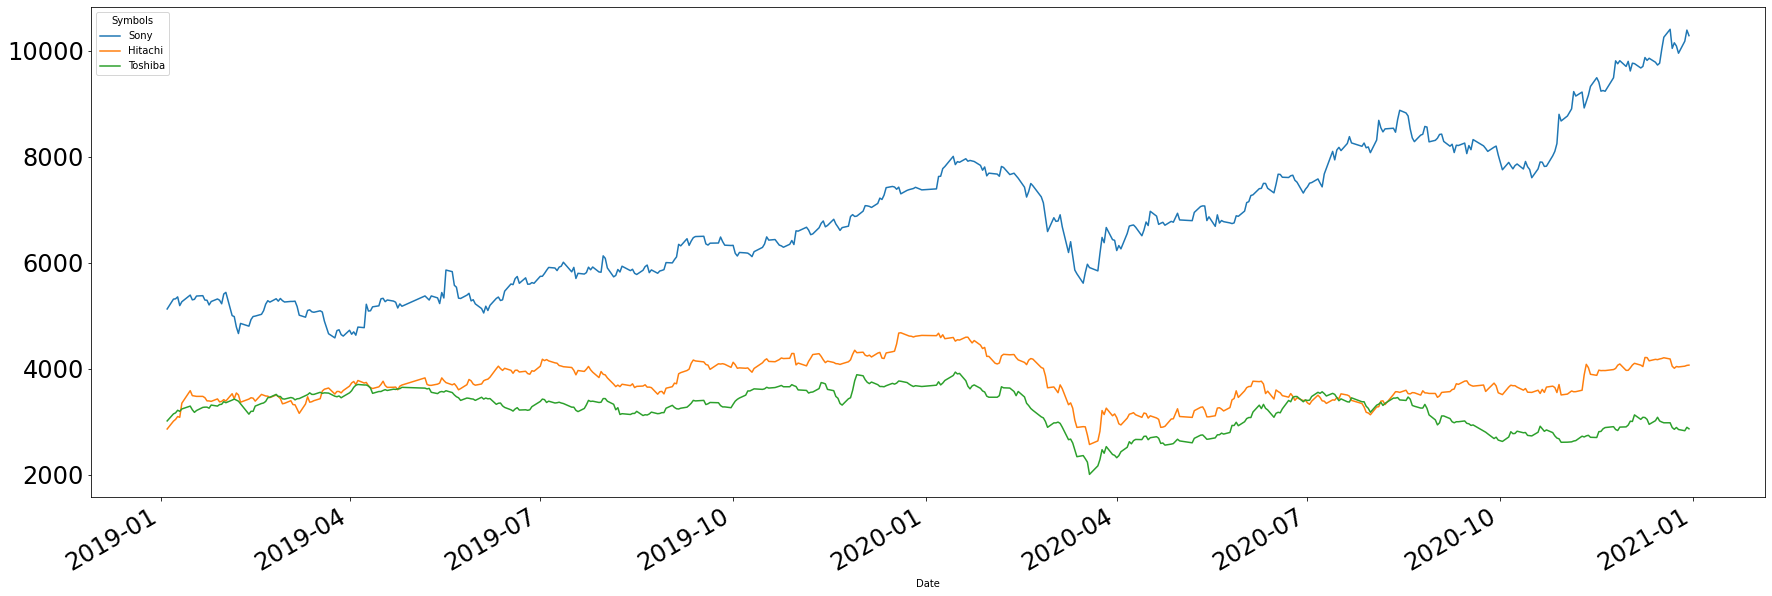

In [13]:
# 可視化（本質的でない）
df.plot(figsize=(30,10), fontsize=24)

In [14]:
# 相関計数
df.corr()

Symbols,Sony,Hitachi,Toshiba
Symbols,,,
Sony,1.000000,0.232530,-0.280072
Hitachi,0.232530,1.000000,0.585738
Toshiba,-0.280072,0.585738,1.000000


---

## 株価の移動平均
移動平均とは，時系列データにおいて「ある一定区間ごとの平均値」を，区間をずらしながら求めた結果である。移動平均により長期的な傾向を表す滑らかな曲線が得られる。

ここで「一定区間」を小さくすれば解像度が高まり，大きく設定すると大まかな傾向が見られる。

pandas の場合，データフレームを df とおくと，次のコードにより移動平均が得られる。ここで「一定区間」を 30 に設定した。

```
df.rolling(window=30, min_periods=0).mean()
```
よく使われる移動平均は，日足の場合，「5日，10日，25日，30日，75日，80日，150日，160日，200日」である。

以下ではソニーの株価を用いて，30日移動平均を求め，可視化する。

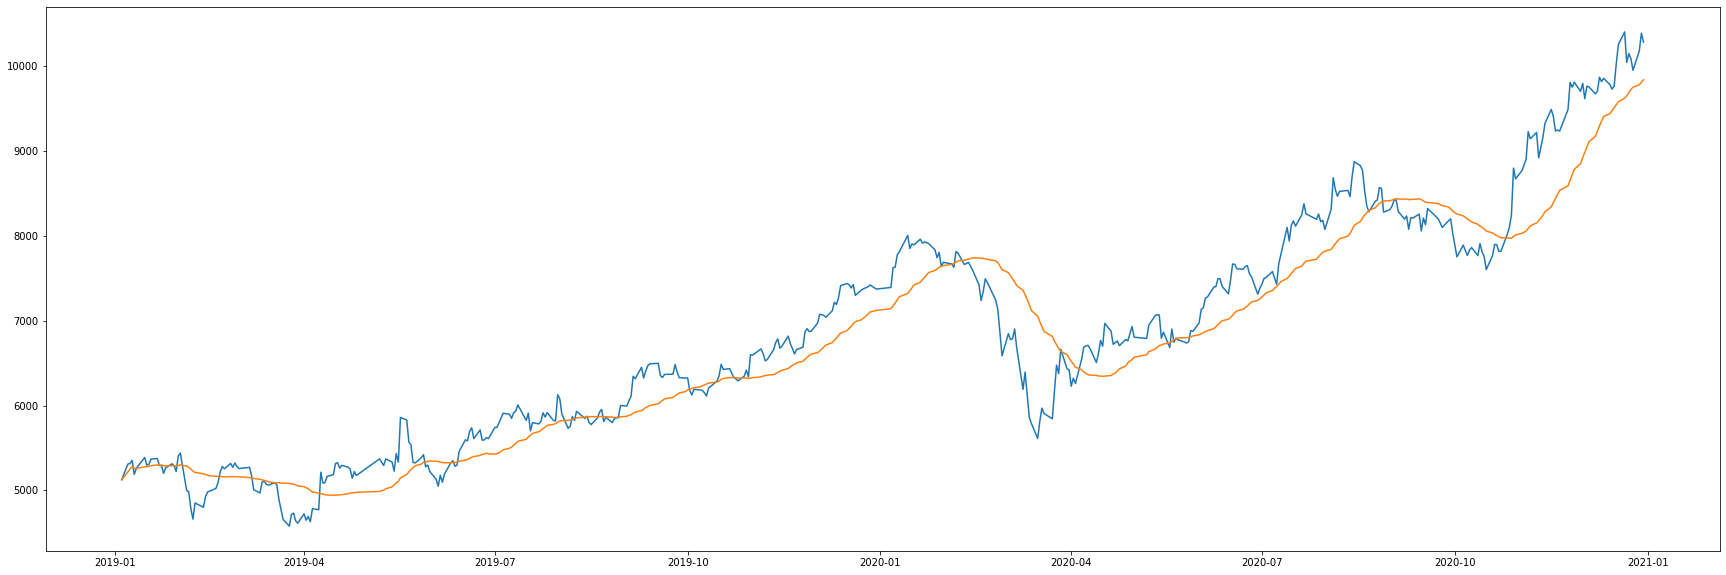

In [15]:
# 移動平均 (MA: moving aberage)
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)

# ソニーの株価データを取得する（銘柄コードは 6758）
sony = data.DataReader('6758.JP', 'stooq', start, end)
sony = sony.sort_index()

# 移動平均 (MA: moving aberage) ここでは 30日移動平均を求めている
sony['30MA'] = sony['Close'].rolling(window=30, min_periods=0).mean()

# 可視化
plt.figure(figsize=(30,10))
plt.plot(sony['Close'])
plt.plot(sony['30MA'])
plt.show()

# 課題
東証に上場している企業から任意に（自分の好きな／知っている）企業を３社，選び，それらの株価の推移をプロットせよ。

また，これらの３社の株価推移の相関を求めよ。